In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv("data/df_post_EDA.csv", index_col=0)
df.head()

,user_ID,chapter_ID,relative_renewal_date,P,A,L,M,S,RGI,RGO,RRI,RRO,V,1-2-1,TYFCB,CEU,year_of_membership,chapter_size,chapter_retention_rate,chapter_growth_rate,seat_popularity_rate,total_meetings,wont_renew
0,0,31,2016-04-01,33,0,0,1,0,21,7,33,32,1,37,129784,45,0,32,0.315789,1.421053,0.076923,34,0
1,2,18,2017-05-01,33,2,2,0,0,6,17,11,22,1,26,9285,1,0,34,0.718750,1.093750,0.266667,37,0
2,2,18,2018-05-01,35,1,0,0,2,6,24,19,36,1,20,7263,10,1,21,0.424242,0.636364,0.210526,38,0
3,2,18,2019-05-01,36,0,0,0,1,9,8,23,19,3,28,1860,31,2,22,0.739130,1.217391,0.263158,37,0
4,2,18,2020-05-01,33,1,0,0,3,10,13,19,47,4,30,6668,16,3,26,0.760000,1.120000,0.277778,37,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2428
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_ID                 2191 non-null   int64  
 1   chapter_ID              2191 non-null   int64  
 2   relative_renewal_date   2191 non-null   object 
 3   P                       2191 non-null   int64  
 4   A                       2191 non-null   int64  
 5   L                       2191 non-null   int64  
 6   M                       2191 non-null   int64  
 7   S                       2191 non-null   int64  
 8   RGI                     2191 non-null   int64  
 9   RGO                     2191 non-null   int64  
 10  RRI                     2191 non-null   int64  
 11  RRO                     2191 non-null   int64  
 12  V                       2191 non-null   int64  
 13  1-2-1                   2191 non-null   int64  
 14  TYFCB                   2191 non-null   

### Drop & split

In [4]:
df.drop(["user_ID", "relative_renewal_date"], axis=1, inplace=True)

# Prepare data
## Feature multiplication

In [5]:
df.columns.tolist()

['chapter_ID',
 'P',
 'A',
 'L',
 'M',
 'S',
 'RGI',
 'RGO',
 'RRI',
 'RRO',
 'V',
 '1-2-1',
 'TYFCB',
 'CEU',
 'year_of_membership',
 'chapter_size',
 'chapter_retention_rate',
 'chapter_growth_rate',
 'seat_popularity_rate',
 'total_meetings',
 'wont_renew']

In [6]:
df.shape

(2191, 21)

In [7]:
df["P_by_A"] = df["P"] / (df["A"] + 1)
df["P_by_M"] = df["P"] / (df["M"] + 1)
df["P_by_S"] = df["P"] / (df["S"] + 1)
df["P_by_total"] = df["P"] / df["total_meetings"]
df["A_by_total"] = df["A"] / df["total_meetings"]
df["M_by_total"] = df["M"] / df["total_meetings"]

df["P_tim_retention"] = df["P"] * df["chapter_retention_rate"]
df["P_tim_growth"] = df["P"] * df["chapter_growth_rate"]
df["P_tim_popularity"] = df["P"] * df["seat_popularity_rate"]
df["P_tim_V"] = df["P"] * df["V"]
df["P2_tim_V"] = df["P"]**2 * df["V"]
df["P_tim_TYFCB"] = df["P"] * df["TYFCB"]

df["year_tim_retention"] = df["year_of_membership"] * df["chapter_retention_rate"]

df["P2"] = df["P"]**2

columns_list = df.columns.tolist()
columns_list.remove("wont_renew")

columns_list+= ["wont_renew"]
df = df[columns_list]

In [8]:
df.shape

(2191, 35)

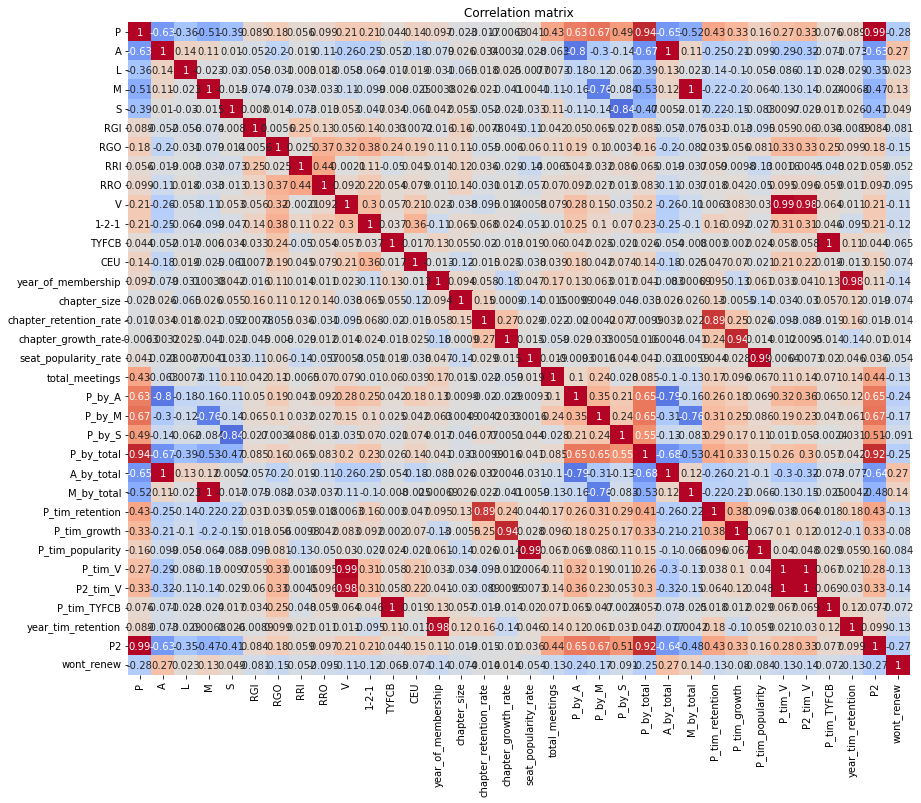

In [7]:
corr = df.iloc[:,1:].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, cbar=False, annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [8]:
df.iloc[:,-12:].describe()

,P_by_total,A_by_total,M_by_total,P_tim_retention,P_tim_growth,P_tim_popularity,P_tim_V,P2_tim_V,P_tim_TYFCB,year_tim_retention,P2,wont_renew
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.00000,2.191000e+03,2191.000000,2191.000000,2191.000000
mean,0.893038,0.041752,0.012016,21.696327,39.185374,8.717460,133.799635,4576.36011,9.625168e+05,1.162574,1113.580100,0.306709
std,0.087667,0.049992,0.041679,5.266794,12.305222,7.015633,140.490919,4979.39035,2.645777e+06,1.698393,221.573501,0.461233
min,0.378378,0.000000,0.000000,2.956522,13.575758,0.000000,0.000000,0.00000,0.000000e+00,0.000000,196.000000,0.000000
25%,0.852941,0.000000,0.000000,18.422648,31.968750,2.784615,34.000000,1156.00000,1.772245e+05,0.000000,961.000000,0.000000
50%,0.916667,0.027027,0.000000,21.863636,37.000000,6.705882,99.000000,3136.00000,4.109880e+05,0.638889,1156.000000,0.000000
75%,0.948718,0.055556,0.000000,25.057453,43.071795,13.052632,185.000000,6286.00000,9.354495e+05,1.636364,1296.000000,1.000000
max,1.000000,0.594595,0.567568,40.000000,108.571429,36.000000,1260.000000,45360.00000,4.877789e+07,17.741935,1600.000000,1.000000


In [9]:
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks, NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

In [10]:
X = df.drop(["wont_renew", "chapter_ID"], axis=1).copy()
y = df["wont_renew"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=710)

print("Original dataset shape: %s" %Counter(y_train))

Original dataset shape: Counter({0: 1215, 1: 537})


In [11]:
under_sampler = TomekLinks()
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)
print("Downsampled dataset shape: %s" %Counter(y_resampled))

Downsampled dataset shape: Counter({0: 1000, 1: 537})


In [12]:
scaler = StandardScaler()
scaler.fit(X_resampled)
X_resampled = pd.DataFrame(scaler.transform(X_resampled), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [13]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   P                       1537 non-null   float64
 1   A                       1537 non-null   float64
 2   L                       1537 non-null   float64
 3   M                       1537 non-null   float64
 4   S                       1537 non-null   float64
 5   RGI                     1537 non-null   float64
 6   RGO                     1537 non-null   float64
 7   RRI                     1537 non-null   float64
 8   RRO                     1537 non-null   float64
 9   V                       1537 non-null   float64
 10  1-2-1                   1537 non-null   float64
 11  TYFCB                   1537 non-null   float64
 12  CEU                     1537 non-null   float64
 13  year_of_membership      1537 non-null   float64
 14  chapter_size            1537 non-null   

# Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier, Pool
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [16]:
df_scores = pd.DataFrame(columns=["training_time [s]", "accuracy", "precision", "recall", "f1", "auc"])

## 1. Logistic Regression

In [17]:
logreg = LogisticRegression(max_iter=2000)

start = time.time()
logreg.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)

df_scores.loc["logistic_regression"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]
df_scores

Elapsed time: 0.02 seconds


,training_time [s],accuracy,precision,recall,f1,auc
logistic_regression,0.02,0.728929,0.588889,0.392593,0.471111,0.702729


## 2. Naive Bayes

In [18]:
naive_bayes = GaussianNB()

start = time.time()
naive_bayes.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = naive_bayes.predict(X_test)
y_proba = naive_bayes.predict_proba(X_test)

df_scores.loc["naive_bayes"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0.00 seconds


## 3. K-neighbors classifier

In [19]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

df_scores.loc["knn"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0.00 seconds


## 4. Decision Tree

In [20]:
dt = DecisionTreeClassifier()

start = time.time()
dt.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)

df_scores.loc["decision_tree"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0.02 seconds


## 5. Random Forest

In [21]:
rf = RandomForestClassifier()

start = time.time()
rf.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

df_scores.loc["random_forest"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0.33 seconds


## 6. AdaBoost

In [22]:
ada = AdaBoostClassifier()

start = time.time()
ada.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = ada.predict(X_test)
y_proba = ada.predict_proba(X_test)

df_scores.loc["AdaBoost"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0.17 seconds


## 7. XGBoost

In [23]:
xg = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc", use_label_encoder=False)

start = time.time()
xg.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = xg.predict(X_test)
y_proba = xg.predict_proba(X_test)

df_scores.loc["XGBoost"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0.16 seconds


## 8. CatBoost

In [24]:
X = df.drop(["wont_renew"], axis=1).copy()
y = df["wont_renew"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=710)

cb = CatBoostClassifier(eval_metric="AUC", cat_features=["chapter_ID"])

start = time.time()
cb.fit(X_train, y_train, verbose=200)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = cb.predict(X_test)
y_proba = cb.predict_proba(X_test)

df_scores.loc["CatBoost"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Learning rate set to 0.01309
0:	total: 172ms	remaining: 2m 51s
200:	total: 5.6s	remaining: 22.3s
400:	total: 11.2s	remaining: 16.7s
600:	total: 16.5s	remaining: 11s
800:	total: 21.9s	remaining: 5.43s
999:	total: 27.3s	remaining: 0us
Elapsed time: 27.48 seconds


## Compare results

In [26]:
df_scores.sort_values("auc", ascending=False)

,training_time [s],accuracy,precision,recall,f1,auc
CatBoost,27.48,0.740319,0.677966,0.296296,0.412371,0.716252
random_forest,0.33,0.724374,0.579545,0.377778,0.457399,0.705251
logistic_regression,0.02,0.728929,0.588889,0.392593,0.471111,0.702729
naive_bayes,0.00,0.674260,0.475904,0.585185,0.524917,0.689108
XGBoost,0.16,0.710706,0.537037,0.429630,0.477366,0.687573
AdaBoost,0.17,0.710706,0.536364,0.437037,0.481633,0.676389
knn,0.00,0.656036,0.425926,0.340741,0.378601,0.622381
decision_tree,0.02,0.615034,0.396341,0.481481,0.434783,0.577912


In [27]:
df_scores.to_csv("model_scores_step5.csv")